In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from adaline import AdalineGD, AdalineSGD
from common import plot_decision_regions, get_iris_df
from perceptron import Perceptron

# The perceptron learning rule

1. Initialize weights to small random numbers
2. For each training example:

    a. Compute output value $\hat{y}$
    
    b. Update the weights, $w_j = w_j + \Delta w_j$, where $\Delta w_j = \alpha ( y - \hat{y}) x_j$

In [2]:
df = get_iris_df()
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class_label
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
y = np.where(df.iloc[:100]["class_label"].values == "Iris-setosa", 1, -1)
X = df.iloc[:100][["sepal_length", "petal_length"]].values

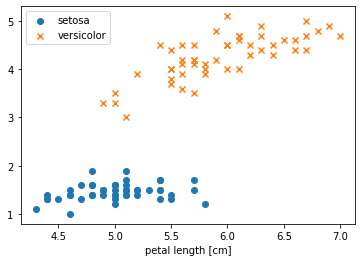

In [4]:
plt.scatter(X[:50, 0], X[:50, 1], marker='o', label='setosa')
plt.scatter(X[-50:, 0], X[-50:, 1], marker='x', label='versicolor')
plt.xlabel('sepal length [cm]')
plt.xlabel('petal length [cm]')
plt.legend()

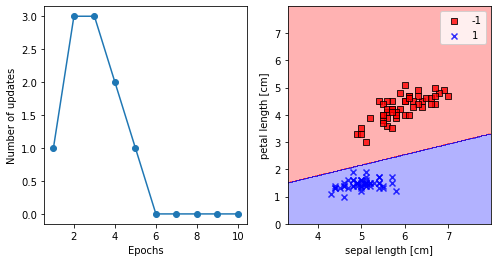

In [5]:
pn = Perceptron(n_iter=10)
pn.fit(X, y)

fig, ax = plt.subplots(1, 2, figsize=(8, 4))

ax[0].plot(range(1, len(pn.errors_) + 1), pn.errors_, marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Number of updates')

plot_decision_regions(X, y, classifier=pn)
ax[1].set_xlabel('sepal length [cm]')
ax[1].set_ylabel('petal length [cm]')

plt.legend()
plt.show()
plt.close()

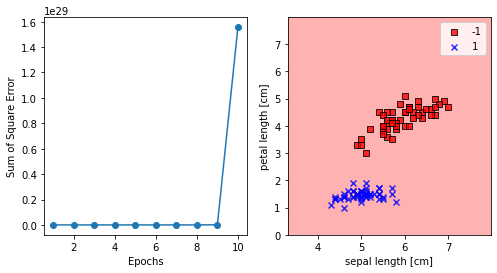

In [6]:
ada = AdalineGD(alpha=0.01, n_iter=10)
ada.fit(X, y)

fig, ax = plt.subplots(1, 2, figsize=(8, 4))

ax[0].plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Sum of Square Error')

plot_decision_regions(X, y, classifier=ada)
ax[1].set_xlabel('sepal length [cm]')
ax[1].set_ylabel('petal length [cm]')
plt.legend()
plt.show()
plt.close()

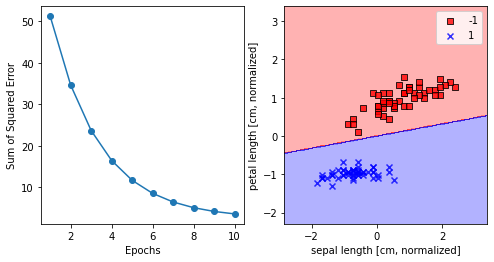

In [7]:
ada = AdalineGD(alpha=0.01, n_iter=10)
X_normed = ((X - X.mean(axis=0)) / X.std(axis=0))
ada.fit(X_normed, y)

fig, ax = plt.subplots(1, 2, figsize=(8, 4))

ax[0].plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Sum of Squared Error')

plot_decision_regions(X_normed, y, classifier=ada)
ax[1].set_xlabel('sepal length [cm, normalized]')
ax[1].set_ylabel('petal length [cm, normalized]')

plt.legend()
plt.show()
plt.close()

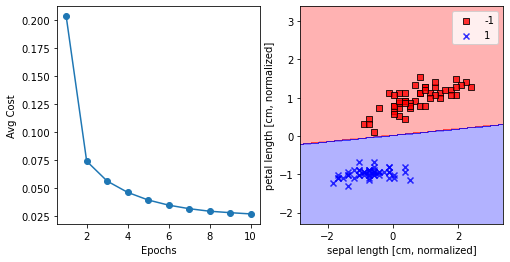

In [8]:
ada = AdalineSGD(alpha=0.01, n_iter=10)
X_normed = ((X - X.mean(axis=0)) / X.std(axis=0))
ada.fit(X_normed, y)

fig, ax = plt.subplots(1, 2, figsize=(8, 4))

ax[0].plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Avg Cost')

plot_decision_regions(X_normed, y, classifier=ada)
ax[1].set_xlabel('sepal length [cm, normalized]')
ax[1].set_ylabel('petal length [cm, normalized]')

plt.legend()
plt.show()
plt.close()